[View in Colaboratory](https://colab.research.google.com/github/sohamshashank1/MLtoolkit/blob/master/TF_Exercise_LR.ipynb)

**LINEAR REGRESSION IN TF **

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [0]:
learning_rate = 0.05
batch_size = 25
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [0]:
model_output = tf.add(tf.matmul(x_data, A), b)

In [0]:
loss = tf.reduce_mean(tf.square(y_target - model_output))


init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)

In [5]:
loss_vec = []
for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ''' + str(temp_loss))

Step #25 A = [[1.9474757]] b = [[2.9964046]]
Loss = 1.144563
Step #50 A = [[1.6112084]] b = [[3.7326016]]
Loss = 0.5879438
Step #75 A = [[1.3004153]] b = [[4.1650796]]
Loss = 0.34875435
Step #100 A = [[1.1125762]] b = [[4.4028826]]
Loss = 0.42327937


In [14]:
## USING ANOTHER LOSS 
from sklearn import datasets
sess = tf.Session()
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])
batch_size = 25
learning_rate = 0.1 # Will not converge with learning rate at 0.4
iterations = 50
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))
model_output = tf.add(tf.matmul(x_data, A), b)


loss_l1 = tf.reduce_mean(tf.abs(y_target - model_output))


init = tf.global_variables_initializer()
sess.run(init)
my_opt_l1 = tf.train.GradientDescentOptimizer(learning_rate)
train_step_l1 = my_opt_l1.minimize(loss_l1)
loss_vec_l1 = []
for i in range(iterations):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step_l1, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss_l1 = sess.run(loss_l1, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec_l1.append(temp_loss_l1)
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))


Step #25 A = [[2.7019632]] b = [[2.0586882]]
Step #50 A = [[2.2447627]] b = [[2.7426887]]


In [0]:
[slope] = sess.run(A)
[y_intercept] = sess.run(b)
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

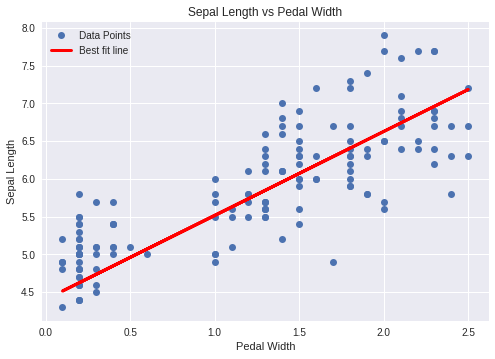

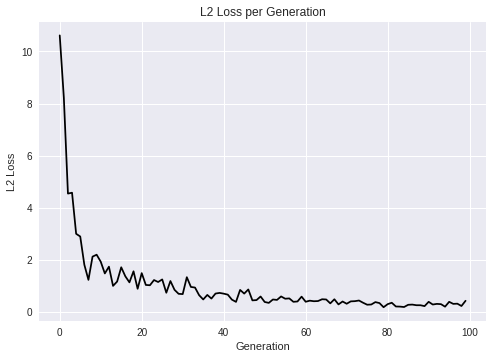

In [10]:
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()

In [10]:
## FULL CODE - TRAIN TEST - CROSS ENTROPY LOSS 
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()
batch_size = 25
x_vals = np.concatenate((np.random.normal(-1, 1, 50), np.random.normal(2, 1, 50)))
y_vals = np.concatenate((np.repeat(0., 50), np.repeat(1., 50)))
x_data = tf.placeholder(shape=[1, None], dtype=tf.float32)
y_target = tf.placeholder(shape=[1, None], dtype=tf.float32)
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))
my_output = tf.add(x_data, A)
init = tf.initialize_all_variables()
sess.run(init)
xentropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = my_output, logits = y_target))
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)
for i in range(1800):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = [x_vals_train[rand_index]]
    rand_y = [y_vals_train[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%200==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(xentropy, feed_dict={x_data: rand_x, y_target: rand_y})))



Step #200 A = [14.787413]
Loss = -6.3211336
Step #400 A = [19.597399]
Loss = -6.036109
Step #600 A = [24.583364]
Loss = -12.83394
Step #800 A = [29.393341]
Loss = -10.365678
Step #1000 A = [34.249325]
Loss = -16.682446
Step #1200 A = [39.221302]
Loss = -14.127013
Step #1400 A = [43.9973]
Loss = -21.342468
Step #1600 A = [48.863266]
Loss = -21.43029
Step #1800 A = [53.63325]
Loss = -34.781696


In [11]:
x_vals

array([ 0.40287393, -1.79474855, -1.96599619, -1.37896836, -2.33706863,
        0.43294061, -0.9309012 ,  0.07033794, -0.72113351, -2.08489534,
       -1.15797056, -0.21106305, -2.24437645, -2.47798761, -0.38881532,
       -1.10979969, -1.74901801, -0.5380129 , -1.47957702, -1.29837747,
       -1.53401131, -0.89241275,  0.09695672, -2.84835161, -0.97713578,
       -0.34022093,  0.18611899, -0.27468753, -1.19640545, -1.0310458 ,
       -0.24750973, -1.98190945, -2.1735219 , -0.02277984, -1.03307643,
       -1.64688803, -1.74139568, -1.87403901, -0.07102282, -0.01184569,
       -0.88558974, -0.60354915,  0.85331195, -1.48077804, -0.47680202,
        0.12386182, -1.59929062, -3.25527539, -0.76415578, -1.86655426,
        1.8584472 ,  1.33902636,  1.91179186,  2.09885383,  3.37732037,
        2.38642269,  2.66775222,  2.83406211,  3.05057642,  3.08098553,
        2.74051223,  3.17206689,  1.92557696,  1.6826902 ,  0.50109665,
        1.54337374,  4.33825342,  2.83303916,  1.05716226,  2.43

In [12]:
## MAKING PREDICTION AND CHECKING ACCURACY 
y_prediction = tf.squeeze(tf.round(tf.nn.sigmoid(tf.add(x_data, A))))
correct_prediction = tf.equal(y_prediction, y_target)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
acc_value_test = sess.run(accuracy, feed_dict={x_data: [x_vals_test], y_target: [y_vals_test]})
acc_value_train = sess.run(accuracy, feed_dict={x_data: [x_vals_train], y_target: [y_vals_train]})
print('Accuracy on train set: ' + str(acc_value_train))
print('Accuracy on test set: ' + str(acc_value_test))

Accuracy on train set: 0.5375
Accuracy on test set: 0.35


**LOGISTIC REGRESSION **

<Response [200]>

In [9]:
import tensorflow as tf
sess = tf.Session()
a = tf.Variable(tf.constant(4.))
x_val = 5.
x_data = tf.placeholder(dtype=tf.float32)
multiplication = tf.multiply(a, x_data)
loss = tf.square(tf.subtract(multiplication, 50.))
init = tf.initialize_all_variables()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)
print('Optimizing a Multiplication Gate Output to 50.')
for i in range(10):
    sess.run(train_step, feed_dict={x_data: x_val})
    a_val = sess.run(a)
    mult_output = sess.run(multiplication, feed_dict={x_data: x_val})
    print(str(a_val) + ' * ' + str(x_val) + ' = ' + str(mult_output))

Optimizing a Multiplication Gate Output to 50.
7.0 * 5.0 = 35.0
8.5 * 5.0 = 42.5
9.25 * 5.0 = 46.25
9.625 * 5.0 = 48.125
9.8125 * 5.0 = 49.0625
9.90625 * 5.0 = 49.53125
9.953125 * 5.0 = 49.765625
9.9765625 * 5.0 = 49.882812
9.988281 * 5.0 = 49.941406
9.994141 * 5.0 = 49.970703


In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
sess = tf.Session()
tf.set_random_seed(50)
np.random.seed(41)
batch_size = 50
a1 = tf.Variable(tf.random_normal(shape=[1,1]))
b1 = tf.Variable(tf.random_uniform(shape=[1,1]))
a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_uniform(shape=[1,1]))
x = np.random.normal(2, 0.1, 500)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1))
relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation, 0.75)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation, 0.75)))
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step_sigmoid = my_opt.minimize(loss1)
train_step_relu = my_opt.minimize(loss2)
init = tf.initialize_all_variables()
sess.run(init)
loss_vec_sigmoid = []
loss_vec_relu = []
activation_sigmoid = []
activation_relu = []
for i in range(750):
    rand_indices = np.random.choice(len(x), size=batch_size)
    x_vals = np.transpose([x[rand_indices]])
    sess.run(train_step_sigmoid, feed_dict={x_data: x_vals})
    sess.run(train_step_relu, feed_dict={x_data: x_vals})

    loss_vec_sigmoid.append(sess.run(loss1, feed_dict={x_data: x_vals}))
    loss_vec_relu.append(sess.run(loss2, feed_dict={x_data: x_vals}))    

activation_sigmoid.append(np.mean(sess.run(sigmoid_activation, feed_dict={x_data: x_vals})))
activation_relu.append(np.mean(sess.run(relu_activation, feed_dict={x_data: x_vals})))
activation_sigmoid


[0.7353722]

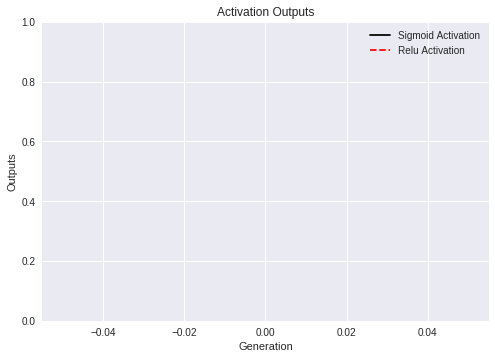

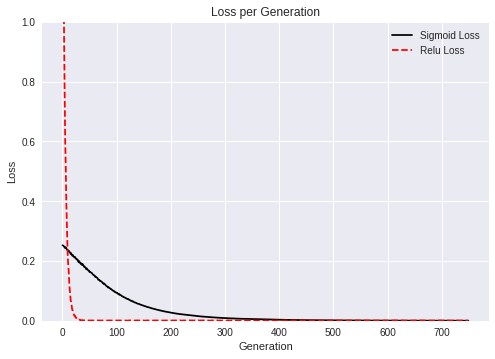

In [17]:
plt.plot(activation_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(activation_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title('Activation Outputs')
plt.xlabel('Generation')
plt.ylabel('Outputs')
plt.legend(loc='upper right')
plt.show()
plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Loss')
plt.plot(loss_vec_relu, 'r--', label='Relu Loss')
plt.ylim([0, 1.0])
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

**CNN BASICS**